LABORATORI 1

In [13]:
import os
print(os.getcwd());
txt_cat = open("buxareu.txt").read();

/home/pausc/CDI/lab1


SIMPLIFICACIÓ

In [14]:
def simplificar(txt):
    txt = txt.lower();
    txt = txt.replace("à", "a"); txt = txt.replace("á", "a"); txt = txt.replace("â", "a"); txt = txt.replace("ä", "a");
    txt = txt.replace("è", "e"); txt = txt.replace("é", "e"); txt = txt.replace("ê", "e"); txt = txt.replace("ë", "e");
    txt = txt.replace("ì", "i"); txt = txt.replace("í", "i"); txt = txt.replace("î", "i"); txt = txt.replace("ï", "i"); 
    txt = txt.replace("ò", "o"); txt = txt.replace("ó", "o"); txt = txt.replace("ô", "o"); txt = txt.replace("ö", "o");
    txt = txt.replace("ù", "u"); txt = txt.replace("ú", "u"); txt = txt.replace("û", "u"); txt = txt.replace("ü", "u");
    txt = txt.replace("ç", "c"); txt = txt.replace("ß", "ss"); txt = txt.replace("ñ", "n");
    txt = txt.replace("·", ""); txt = txt.replace(".", ""); txt = txt.replace("º", ""); txt = txt.replace("ª", "");
    txt = txt.replace(",", ""); txt = txt.replace(":", ""); txt = txt.replace("?", ""); txt = txt.replace(";", "");
    txt = txt.replace("", ""); txt = txt.replace("-", " "); txt = txt.replace("'", " "); txt = txt.replace("\n", " ");
    txt = txt.replace("_", " "); txt = txt.replace("*", ""); txt = txt.replace("«", " "); txt = txt.replace("»", " "); 
    txt = txt.replace("\ufeff", " "); txt = txt.replace("(", " "); txt = txt.replace(")", " "); txt = txt.replace("¡", " ");
    txt = txt.replace("!", " "); txt = txt.replace("¿", " ");
    txt = txt.replace("  ", " "); txt = txt.replace("  ", " ");
    return txt

In [15]:
txt_cat = simplificar(txt_cat)
open("clean_buxareu.txt", "w").write(txt_cat)

257680

CALCULAR ESTADÍSTIQUES PARAULES + GRÀFICA

In [16]:
def source_fromtext(txt):
    #aparicions = {' ': 0, 'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0, '0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
    aparicions = {}
    for i in txt:
        for j in i:
            if (aparicions.get(j) != None):
                #aparicions.update({j:0})
                aparicions.update({j:aparicions.get(j)+1})
            else:
                aparicions.update({j:1})
    #print(aparicions)
    return aparicions

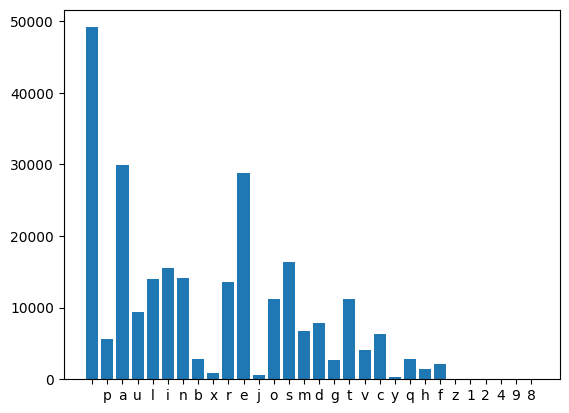

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

def histogram(txt):
    plt.bar(txt.keys(), txt.values())
    plt.show()

histogram(source_fromtext(txt_cat))

In [18]:
import random

def select_random(aparicions, txt_len): 
    rand_val = random.randint(0, txt_len)
    total = 0  
    for k, v in aparicions.items():
        total += v
        if rand_val <= total:
            return k

def random_txt(txt, n):
    aparicions = source_fromtext(txt)
    sol = ""
    for i in range(n-1):
        sol += select_random(aparicions,  len(txt))
    print(sol)

txt = "Setze jutges d'un jutjat mengen fetge d'un penjat."
random_txt(txt, len(txt))

' dsju ej uS'e Setj nedpe 'gjute aS ea mu  ee mnu


In [19]:
def rec_calcular_aparicions(txt, aparicions):
    if (len(txt) == 1):
        if (aparicions.get(txt[0]) != None):
            aparicions.update({txt[0]:aparicions.get(txt[0])+1})
        else:
            aparicions.update({txt[0]:1})
    else:
        if (aparicions.get(txt[0]) == None):
            aparicions.update({txt[0]:{}})
        rec_calcular_aparicions(txt[1:], aparicions.get(txt[0]))

def rec_select_random(aparicions, total): 
    for k, v in aparicions.items():
        print(k,v)
        if (type(v) == int):
            if (total == 0):
                return k
        else:
            print(len(v))
            total -= len(v)
            lletra = rec_select_random(v, total)
            if(lletra):
                #print(lletra)
                return lletra
            
def random_text_Markov(txt,k,n):
    #CALCULAR APARICIONS
    aparicions = {}
    for i in range(len(txt)-k):
        if (aparicions.get(txt[i]) == None):
            aparicions.update({txt[i]:{}})
        rec_calcular_aparicions(txt[i+1:i+k], aparicions.get(txt[i]))
    
    #TRIAR LES LLETRES 
    sol = ""
    for i in range(n):
        total = random.randint(0, len(txt)-k)
        #sol = rec_select_random(aparicions, total)
        sol += str(rec_select_random(aparicions, total))
    return sol

    
txt = "Setze jutges d'un jutjat mengen fetge d'un penjat."
sol = random_text_Markov(txt, 4, 100)
print(sol)

S {'e': {'t': {'z': 1}}}
1
e {'t': {'z': 1}}
1
t {'z': 1}
1
z 1
e {'t': {'z': {'e': 1}, 'g': {'e': 1}}, ' ': {'j': {'u': 1}, 'd': {"'": 1}}, 's': {' ': {'d': 1}}, 'n': {'g': {'e': 1}, ' ': {'f': 1}, 'j': {'a': 1}}}
4
t {'z': {'e': 1}, 'g': {'e': 1}}
2
z {'e': 1}
1
e 1
g {'e': 1}
1
e 1
  {'j': {'u': 1}, 'd': {"'": 1}}
2
j {'u': 1}
1
u 1
d {"'": 1}
1
' 1
s {' ': {'d': 1}}
1
  {'d': 1}
1
d 1
n {'g': {'e': 1}, ' ': {'f': 1}, 'j': {'a': 1}}
3
g {'e': 1}
1
e 1
  {'f': 1}
1
f 1
j {'a': 1}
1
a 1
t {'z': {'e': {' ': 1}}, 'g': {'e': {'s': 1, ' ': 1}}, 'j': {'a': {'t': 1}}, ' ': {'m': {'e': 1}}}
4
z {'e': {' ': 1}}
1
e {' ': 1}
1
  1
g {'e': {'s': 1, ' ': 1}}
1
e {'s': 1, ' ': 1}
2
s 1
  1
j {'a': {'t': 1}}
1
a {'t': 1}
1
t 1
  {'m': {'e': 1}}
1
m {'e': 1}
1
e 1
z {'e': {' ': {'j': 1}}}
1
e {' ': {'j': 1}}
1
  {'j': 1}
1
j 1
  {'j': {'u': {'t': 2}}, 'd': {"'": {'u': 2}}, 'm': {'e': {'n': 1}}, 'f': {'e': {'t': 1}}, 'p': {'e': {'n': 1}}}
5
j {'u': {'t': 2}}
1
u {'t': 2}
1
t 2
d {"'": {'u': 2}}
1
' 